<font size="5">4.10 Coding etiquette & Excel Reporting

This script contains the following points:
1.  Import libraries
2.  Import data
3.  PII Data considerations
4.  Remove prices >100
5.  Add Region flag
6.  Initial Analysis & Insights
7.  Export Data to pkl file
8.  Import Departments file and add to main data set
9.  Create age and income bracket flags  
10. Analysis & Insights continued
</font>

<font size="5">1. Import Libraries</font>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<font size="5">2. Import Data</font>

In [2]:
#Set OS Path
path = r'/Users/faridchehraz/Desktop/Python/Master - Dec2021 Instacart Basket Analysis'

In [3]:
#Import sales_cust file as DF
sales_cust = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'sales_cust.pkl'))

<font size="5">3. PII Data Considerations</font>

In [4]:
#Check dataframe columns for PII
pd.set_option('display.max_columns', None)
sales_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


With regards to PII, I had previously removed the name and surname fields from the customer data file

<font size="5">4. Remove prices >100</font>

In [5]:
#Check for values >100
sales_cust.loc[sales_cust['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col
1576,912404,17,12,2,14,5.0,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,Female,Kansas,39,9/16/2018,3,married,150659,both
1638,603376,17,22,6,16,4.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,Female,Kansas,39,9/16/2018,3,married,150659,both
16534,3264360,135,2,2,21,13.0,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,Female,Maryland,30,3/19/2017,3,married,120635,both
16540,892534,135,3,0,8,12.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,Female,Maryland,30,3/19/2017,3,married,120635,both
53712,229704,342,8,1,19,30.0,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,18,1,9,7.0,21553,17,1,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32377867,2504315,205818,3,5,15,3.0,21553,13,0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy days,Most orders,25,Regular customer,170.073770,High spender,12.5,Regular customer,Male,Maryland,60,7/12/2019,1,married,172539,both
32377877,1108388,205818,5,4,5,1.0,21553,5,1,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Least busy,Least busy days,Fewest orders,25,Regular customer,170.073770,High spender,12.5,Regular customer,Male,Maryland,60,7/12/2019,1,married,172539,both
32410707,1916142,206049,1,2,17,NaN,21553,2,0,both,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,High-range product,Regularly busy,Regularly busy days,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [6]:
#Set values >100 as NaN / missing
sales_cust.loc[sales_cust['prices'] >100, 'prices'] = np.nan

<font size="5">5. Add Region flag</font>

In [7]:
#Check states
stateslist = sales_cust['state'].unique()
print(stateslist)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


States in dataframe are correct i.e. no inconsistencies or missing states

In [8]:
#Create region lists
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [9]:
#using np.select add regions column
cond=[sales_cust['state'].isin(Northeast),sales_cust['state'].isin(Midwest),sales_cust['state'].isin(South),sales_cust['state'].isin(West)]
values=['Northeast','Midwest','South','West']
sales_cust['region']=np.select(cond,values)

In [10]:
#Check dataframe columns output
pd.set_option('display.max_columns', None)
sales_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col,region
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


<font size="5">6. Initial Analysis & Insights</font>

In [11]:
#Create crosstab
crosstab = pd.crosstab(sales_cust['region'], sales_cust['spender_flag'], dropna = False)

In [12]:
#Copy crosstab to clipboard
crosstab.to_clipboard()

Interstingly, the split between high and low spenders is in line across all regions around 2% & 98%.

In [13]:
#Create activity flag criteria - low activity
sales_cust.loc[sales_cust['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [14]:
#Create activity flag criteria - normal activity
sales_cust.loc[sales_cust['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [15]:
sales_cust.shape

(32435059, 35)

In [16]:
#Activity flag groupings count
sales_cust['activity_flag'].value_counts(dropna = False)

Normal activity    30993489
Low activity        1441570
Name: activity_flag, dtype: int64

In [17]:
#Check dataframe columns output
pd.set_option('display.max_columns', None)
sales_cust.tail(3000)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col,region,activity_flag
32432059,2197889,206196,3,6,16,25.0,722,3,1,both,Snack Sticks Chicken & Rice Recipe Dog Treats,40.0,8.0,4.8,both,Low-range product,Regularly busy,Regularly busy days,Most orders,4,New customer,7.947778,Low spender,25.0,Non-frequent customer,Male,Arizona,31,7/25/2018,2,married,80263,both,West,Low activity
32432060,2197889,206196,3,6,16,25.0,9124,4,1,both,Broccoli & Cheddar Bake Meal Bowl,38.0,1.0,9.0,both,NaN,Regularly busy,Regularly busy days,Most orders,4,New customer,7.947778,Low spender,25.0,Non-frequent customer,Male,Arizona,31,7/25/2018,2,married,80263,both,West,Low activity
32432061,2197889,206196,3,6,16,25.0,24852,5,1,both,Banana,24.0,4.0,12.3,both,NaN,Regularly busy,Regularly busy days,Most orders,4,New customer,7.947778,Low spender,25.0,Non-frequent customer,Male,Arizona,31,7/25/2018,2,married,80263,both,West,Low activity
32432062,2197889,206196,3,6,16,25.0,27104,6,1,both,Fresh Cauliflower,83.0,4.0,6.7,both,NaN,Regularly busy,Regularly busy days,Most orders,4,New customer,7.947778,Low spender,25.0,Non-frequent customer,Male,Arizona,31,7/25/2018,2,married,80263,both,West,Low activity
32432063,2197889,206196,3,6,16,25.0,26209,7,1,both,Limes,24.0,4.0,14.7,both,NaN,Regularly busy,Regularly busy days,Most orders,4,New customer,7.947778,Low spender,25.0,Non-frequent customer,Male,Arizona,31,7/25/2018,2,married,80263,both,West,Low activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,2977660,206209,13,1,12,7.0,14197,5,1,both,Tomato Paste,9.0,9.0,5.6,both,NaN,Regularly busy,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Normal activity
32435055,2977660,206209,13,1,12,7.0,38730,6,0,both,Brownie Crunch High Protein Bar,3.0,19.0,5.9,both,NaN,Regularly busy,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Normal activity
32435056,2977660,206209,13,1,12,7.0,31477,7,0,both,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,both,Low-range product,Regularly busy,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Normal activity
32435057,2977660,206209,13,1,12,7.0,6567,8,0,both,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,both,Low-range product,Regularly busy,Busiest days,Most orders,13,Regular customer,7.058915,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest,Normal activity


<font size="5">7. Export Data to pkl file</font>

In [18]:
#Export DF as sales_cust_activity.pkl
sales_cust.to_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'sales_cust_activity.pkl'))

In [19]:
# List of available fields
sales_cust.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
Check                     category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_order_cost_by_cust     float64
spender_flag                object
cust_frequency             float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined         

<font size="5">8. Import Departments file and add to main data set</font>

In [20]:
#Import departments file as dataframe
departments = pd.read_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'departments.csv'), index_col=0)
#df = pd.read_csv(your_file_path, names = ['first column', 'second column'])

In [21]:
#Check departments dataframe output
departments.head(25)

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [22]:
#Add deparmtnet name to sales_cust dataframe
final_df = sales_cust.merge(departments, on = ['department_id'], how = 'left', indicator = 'Check_join_dept')

In [23]:
#Check final dataframe output
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col,region,activity_flag,department,Check_join_dept
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,beverages,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,dairy eggs,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,snacks,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,snacks,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,household,both


In [24]:
#Check final dataframe shape rows = sales_cust shape rows
final_df.shape

(32435059, 37)

In [25]:
agelist = final_df['age'].unique()
agelist.sort()
print(agelist)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]


<font size="5">9. Create age and income bracket flags</font>

In [26]:
#Create age ranges
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 24), 'Generation'] = 'Generation Z 18-24'
final_df.loc[(final_df['age'] >= 25) & (final_df['age'] <= 40), 'Generation'] = 'Millenials 25-40'
final_df.loc[(final_df['age'] >= 41) & (final_df['age'] <= 56), 'Generation'] = 'Generation X 41-56'
final_df.loc[(final_df['age'] >= 57) & (final_df['age'] <= 75), 'Generation'] = 'Baby Boomers 57-75'
final_df.loc[final_df['age'] > 75, 'Generation'] = 'The Silent Generation >75'

In [27]:
#Create income brackets
final_df.loc[(final_df['income'] >= 0) & (final_df['income'] < 50000), 'Income Bracket'] = 'Low <50k'
final_df.loc[(final_df['income'] >= 50000) & (final_df['income'] < 75000), 'Income Bracket'] = 'Low/middle 50k-74k'
final_df.loc[(final_df['income'] >= 75000) & (final_df['income'] < 100000), 'Income Bracket'] = 'Middle 75k-99k'
final_df.loc[(final_df['income'] >= 100000) & (final_df['income'] < 150000), 'Income Bracket'] = 'Middle/high 100k-149k'
final_df.loc[final_df['income'] > 150000, 'Income Bracket'] = 'High 150k+'

<font size="5">10. Analysis & Insights continued

In [28]:
#Count number of unique users
userlist = final_df['user_id'].unique()
userlist.sort()
print(userlist)

[     1      2      3 ... 206207 206208 206209]


In [29]:
#Count number of unique users by Generation
final_df.groupby('Generation')['user_id'].nunique()

Generation
Baby Boomers 57-75           60821
Generation X 41-56           51983
Generation Z 18-24           22560
Millenials 25-40             51404
The Silent Generation >75    19441
Name: user_id, dtype: int64

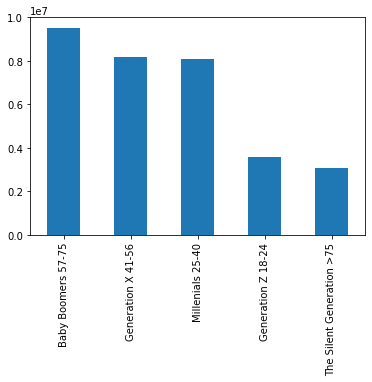

In [30]:
#Graph number of unique users by Generation
Generation_bar = final_df['Generation'].value_counts().plot.bar()
Generation_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Generation_bar_1902.png'))

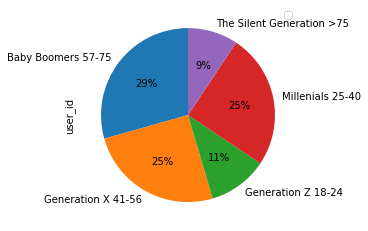

In [31]:
# Pie chart users by generation
Generation_pie = final_df.groupby(['Generation']).sum().plot(kind='pie', y='user_id', startangle=90, autopct='%1.0f%%')
plt.legend('')
Generation_pie.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Generation_pie_1902.png'))

In [32]:
#Sum sales by Generation
final_df.groupby(['Generation'])['prices'].agg('sum')

Generation
Baby Boomers 57-75           74217790.7
Generation X 41-56           63601876.0
Generation Z 18-24           27831958.9
Millenials 25-40             63023165.8
The Silent Generation >75    23751329.2
Name: prices, dtype: float64

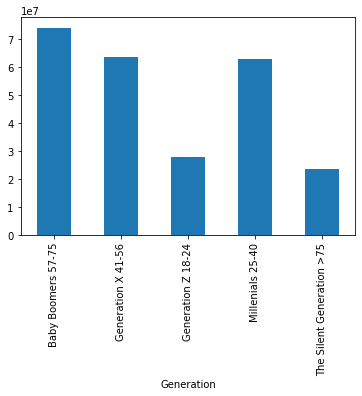

In [33]:
#Graph number of Sales by Generation
Generation_sales_bar = final_df.groupby(['Generation'])['prices'].agg('sum').plot.bar()
Generation_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Sales_Generation_bar_1902.png'))

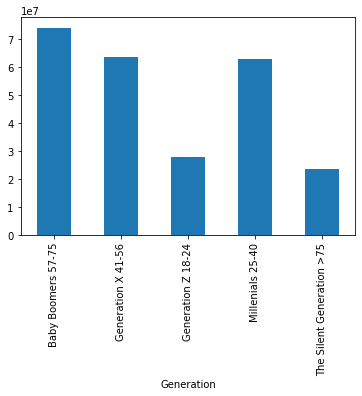

In [34]:
#Graph number of Sales by Generation
Generation_sales_bar = final_df.groupby(['Generation'])['prices'].agg('sum').plot.bar()
Generation_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Sales_Generation_bar_1902.png'))

In [35]:
#Count number of unique users by Income bracket
final_df.groupby('Income Bracket')['user_id'].nunique()

Income Bracket
High 150k+               23251
Low <50k                 34105
Low/middle 50k-74k       42749
Middle 75k-99k           42097
Middle/high 100k-149k    64004
Name: user_id, dtype: int64

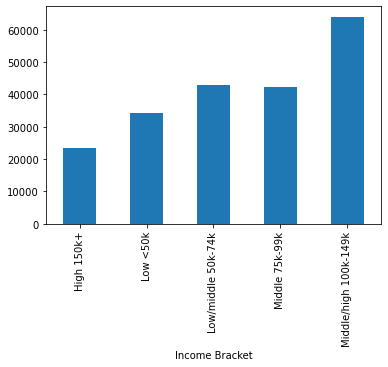

In [36]:
#Graph number of unique users by Income bracket
Income_users_bar = final_df.groupby('Income Bracket')['user_id'].nunique().plot.bar()
Income_users_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Income_users_bar_1902.png'))

In [37]:
#Sum sales by Income Bracket
final_df.groupby(['Income Bracket'])['prices'].agg('sum')

Income Bracket
High 150k+               32161392.7
Low <50k                 24069521.7
Low/middle 50k-74k       53569566.6
Middle 75k-99k           56911074.8
Middle/high 100k-149k    85709057.0
Name: prices, dtype: float64

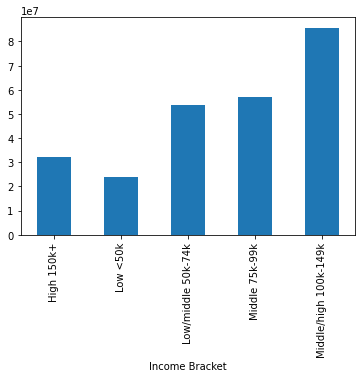

In [38]:
#Graph sales by Income bracket
Income_sales_bar = final_df.groupby(['Income Bracket'])['prices'].agg('sum').plot.bar()
Income_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Income_sales_bar_1902.png'))

In [39]:
#Exploring correlation between region and generation
crosstab_Gen_Income = pd.crosstab(final_df['Generation'], final_df['Income Bracket'], dropna = False)
print(crosstab_Gen_Income)
crosstab_Gen_Income.to_clipboard()

Income Bracket             High 150k+  Low <50k  Low/middle 50k-74k  \
Generation                                                            
Baby Boomers 57-75            1818548    789042              679401   
Generation X 41-56            1567976    708693              582429   
Generation Z 18-24              32240    560539             1623055   
Millenials 25-40                76517   1272408             3746611   
The Silent Generation >75      559215    267263              223688   

Income Bracket             Middle 75k-99k  Middle/high 100k-149k  
Generation                                                        
Baby Boomers 57-75                1416811                4824567  
Generation X 41-56                1190396                4122720  
Generation Z 18-24                1277826                  82749  
Millenials 25-40                  2827247                 181671  
The Silent Generation >75          441905                1560799  


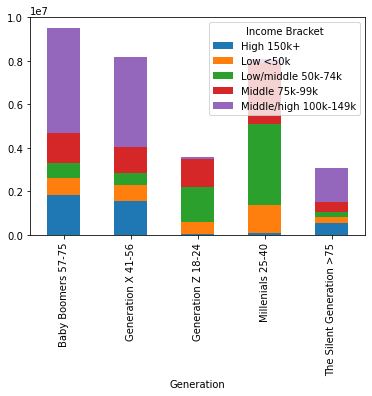

In [40]:
#Graph Generation & Income brackets
crosstab_Gen_Income_graph = crosstab_Gen_Income.plot(kind='bar', stacked=True)

In [41]:
#Count number of unique users by family status
final_df.groupby('fam_status')['user_id'].nunique()

fam_status
divorced/widowed                     17640
living with parents and siblings      9701
married                             144906
single                               33962
Name: user_id, dtype: int64

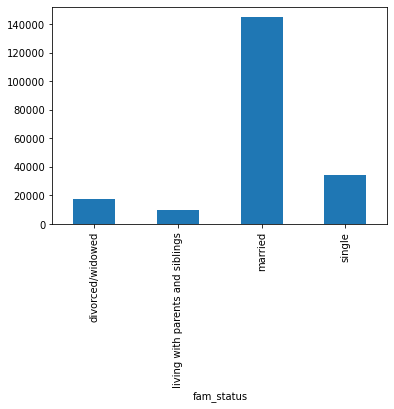

In [42]:
#Graph users by family status
Family_status_bar = final_df.groupby('fam_status')['user_id'].nunique().plot.bar()
Family_status_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Family_status_bar_1902.png'))

In [43]:
#Sum sales by family status
final_df.groupby(['fam_status'])['prices'].agg('sum')

fam_status
divorced/widowed                     21619270.8
living with parents and siblings     12094239.6
married                             177262104.9
single                               41450505.3
Name: prices, dtype: float64

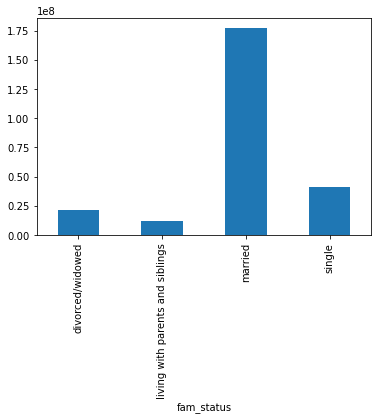

In [44]:
#Graph sales by family status
Family_sales_bar = final_df.groupby(['fam_status'])['prices'].agg('sum').plot.bar()
Family_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Family_sales_bar_1902.png'))

In [45]:
#Create customer profiles

final_df.loc[(final_df['fam_status'] == 'single') & (final_df['no_dependents'] == 0 ), 'Cust_profile'] = 'Single, no dependents'
final_df.loc[(final_df['fam_status'] == 'single') & (final_df['no_dependents'] >=1 ), 'Cust_profile'] = 'Single, with dependents'

final_df.loc[(final_df['age'] <= 40) & (final_df['no_dependents'] >=1 ), 'Cust_profile'] = 'Young parent' 
final_df.loc[(final_df['age'] > 40) & (final_df['no_dependents'] >=1 ), 'Cust_profile'] = 'Older parent'

final_df.loc[(final_df['age'] >= 57) & (final_df['age'] <= 75), 'Cust_profile'] = 'Early retired'
final_df.loc[final_df['age'] > 75, 'Cust_profile'] = 'Older retired'

final_df.loc[final_df['income'] > 150000, 'Cust_profile'] = 'High earner >150k'

final_df.loc[(final_df['fam_status'] == 'married') & (final_df['no_dependents'] >=1 ) & (final_df['income'] >= 0) & (final_df['income'] < 75000), 'Cust_profile'] = 'Married, low/middle income with dep'
final_df.loc[(final_df['fam_status'] == 'married') & (final_df['no_dependents'] >=1 ) & (final_df['income'] >= 75000) & (final_df['income'] < 150000), 'Cust_profile'] = 'Married, middle/high income with dep'
final_df.loc[(final_df['fam_status'] == 'married') & (final_df['no_dependents'] >=1 ) & (final_df['income'] > 150000), 'Cust_profile'] = 'Married, high income with dep'

final_df.loc[(final_df['fam_status'] == 'married') & (final_df['no_dependents'] == 0 ) & (final_df['income'] >= 0) & (final_df['income'] < 75000), 'Cust_profile'] = 'Married, low/middle income no dep'
final_df.loc[(final_df['fam_status'] == 'married') & (final_df['no_dependents'] == 0 ) & (final_df['income'] >= 75000) & (final_df['income'] < 150000), 'Cust_profile'] = 'Married, middle/high income no dep'
final_df.loc[(final_df['fam_status'] == 'married') & (final_df['no_dependents'] == 0 ) & (final_df['income'] > 150000), 'Cust_profile'] = 'Married, high income no dep'

In [46]:
#Count number of unique users by Customer profile
final_df.groupby('Cust_profile')['user_id'].nunique().sort_values(ascending=False)

Cust_profile
Married, middle/high income with dep    76209
Married, low/middle income with dep     51323
Single, no dependents                   29162
Married, high income with dep           17372
Early retired                           12589
Young parent                             9652
High earner >150k                        5879
Older retired                            4021
Older parent                                2
Name: user_id, dtype: int64

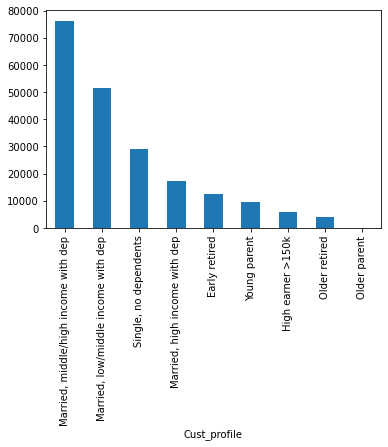

In [47]:
#Graph customer profile
Cust_profile_bar = final_df.groupby('Cust_profile')['user_id'].nunique().sort_values(ascending=False).plot.bar()
Cust_profile_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Cust_profile_bar_1902.png'))

In [48]:
#Sum sales by Customer profile
round(final_df.groupby(['Cust_profile'])['prices'].agg('sum').sort_values(ascending=False),0)

Cust_profile
Married, middle/high income with dep    102393549.0
Married, low/middle income with dep      51029707.0
Single, no dependents                    34980366.0
Married, high income with dep            23837260.0
Early retired                            15055375.0
Young parent                             11974598.0
High earner >150k                         8324133.0
Older retired                             4829544.0
Older parent                                 1589.0
Name: prices, dtype: float64

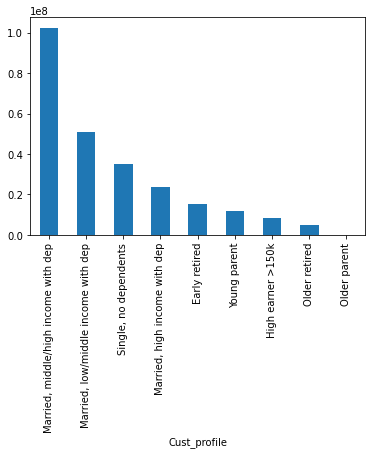

In [49]:
#Graph sales by customer profile
Cust_profile_sales_bar = round(final_df.groupby(['Cust_profile'])['prices'].agg('sum').sort_values(ascending=False),0).plot.bar()
Cust_profile_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Cust_profile_sales_bar_1902.png'))

In [50]:
#Sum average sales by Customer profile
round(final_df.groupby(['Cust_profile'])['prices'].agg('sum')/final_df.groupby('Cust_profile')['user_id'].nunique(),0).sort_values(ascending=False)

Cust_profile
High earner >150k                       1416.0
Married, high income with dep           1372.0
Married, middle/high income with dep    1344.0
Young parent                            1241.0
Older retired                           1201.0
Single, no dependents                   1200.0
Early retired                           1196.0
Married, low/middle income with dep      994.0
Older parent                             794.0
dtype: float64

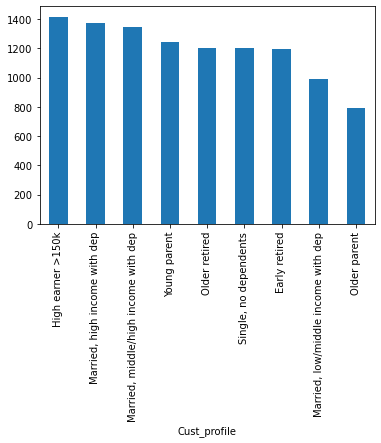

In [51]:
#Graph sales by customer profile
Avg_Cust_profile_sales_bar = round(final_df.groupby(['Cust_profile'])['prices'].agg('sum')/final_df.groupby('Cust_profile')['user_id'].nunique(),0).sort_values(ascending=False).plot.bar()
Avg_Cust_profile_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'Avg_Cust_profile_sales_bar_1902.png'))

In [52]:
#Price analysis by Customer profile
final_df.groupby('Cust_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                          mean  min   max
Cust_profile                                             
Early retired                         7.763784  1.0  25.0
High earner >150k                     7.935492  1.0  25.0
Married, high income with dep         7.951057  1.0  25.0
Married, low/middle income with dep   7.400645  1.0  25.0
Married, middle/high income with dep  7.962456  1.0  25.0
Older parent                          7.675362  1.1  14.8
Older retired                         7.773877  1.0  25.0
Single, no dependents                 7.770186  1.0  25.0
Young parent                          7.799014  1.0  25.0

In [53]:
#Compare your customer profiles with regions and departments. Can you identify a link between them? 
#Customers may demonstrate different behaviors across regions, which could make this information important.

# Exploring correlation between Customer profiles and departments
pivot_Cust_profile_dept = np.round(final_df.pivot_table(index='department', columns='Cust_profile', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Cust_profile_dept)
pivot_Cust_profile_dept.to_clipboard()

Cust_profile     Early retired  High earner >150k  \
department                                          
alcohol                71106.0            55560.0   
babies                189056.0           110430.0   
bakery                541986.0           310127.0   
beverages            1234129.0           657331.0   
breakfast             335012.0           183589.0   
bulk                   15485.0             8551.0   
canned goods          469675.0           267848.0   
dairy eggs           2696090.0          1501323.0   
deli                  497893.0           264036.0   
dry goods pasta       381932.0           210992.0   
frozen               1032245.0           583872.0   
household             313235.0           192404.0   
international         122796.0            68524.0   
meat seafood          687135.0           382784.0   
missing                33138.0            18910.0   
other                  15528.0             9231.0   
pantry                892216.0           51067

In [54]:
# Exploring correlation between Customer profiles and regions
pivot_Cust_profile_region = np.round(final_df.pivot_table(index='Cust_profile', columns='region', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Cust_profile_region)
pivot_Cust_profile_region.to_clipboard()

region                                   Midwest   Northeast       South  \
Cust_profile                                                               
Early retired                          3563220.0   2719356.0   5008870.0   
High earner >150k                      1896779.0   1438272.0   2808338.0   
Married, high income with dep          5677297.0   4179167.0   7854715.0   
Married, low/middle income with dep   11938705.0   8835260.0  16967244.0   
Married, middle/high income with dep  23865774.0  18392815.0  34095488.0   
Older parent                                 NaN       390.0      1199.0   
Older retired                          1168992.0    845302.0   1548719.0   
Single, no dependents                  8238077.0   6044476.0  11755865.0   
Young parent                           2844133.0   2075068.0   4067472.0   
Total                                 59192978.0  44530106.0  84107910.0   

region                                      West        Total  
Cust_profile           

In [55]:
# Exploring correlation between Customer profiles and order day of the week
pivot_Cust_profile_dow = np.round(final_df.pivot_table(index='Cust_profile', columns='orders_day_of_week', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Cust_profile_dow)
pivot_Cust_profile_dow.to_clipboard()

orders_day_of_week                             0           1           2  \
Cust_profile                                                               
Early retired                          2880565.0   2624029.0   1965175.0   
High earner >150k                      1608562.0   1456198.0   1060961.0   
Married, high income with dep          4647235.0   4072432.0   3060759.0   
Married, low/middle income with dep    9345577.0   9227824.0   6751058.0   
Married, middle/high income with dep  20260116.0  17445338.0  13160590.0   
Older parent                               549.0       135.0       183.0   
Older retired                           951368.0    815740.0    608792.0   
Single, no dependents                  6747955.0   6184280.0   4512864.0   
Young parent                           2301287.0   2088458.0   1549336.0   
Total                                 48743215.0  43914435.0  32669718.0   

orders_day_of_week                             3           4           5  \
Cust_profil

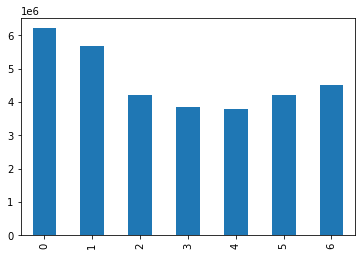

In [56]:
#The sales team needs to know what the busiest days of the week and hours of the day are 
#(i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.
#Busiest day of the week graph
busiest_days_bar = final_df['orders_day_of_week'].value_counts().sort_index().plot.bar()
busiest_days_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'busiest_days_bar_1902.png'))

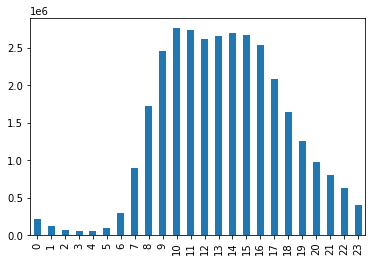

In [57]:
#They also want to know whether there are particular times of the day when people spend the most money, 
#as this might inform the type of products they advertise at these times.
# Busiest hours of the day
busiest_hour_bar = final_df['order_hour_of_day'].value_counts().sort_index().plot.bar()
busiest_hour_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'busiest_hour_bar_1902.png'))

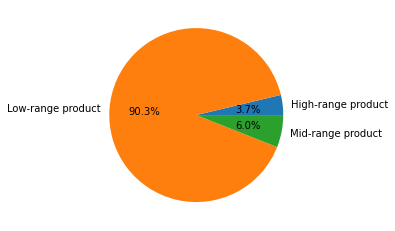

In [58]:
#Instacart has a lot of products with different price tags. Marketing and sales want to use
#simpler price range groupings to help direct their efforts.
#Product price groupings
product_price_pie = final_df['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
product_price_pie.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'product_price_pie_1902.png'))

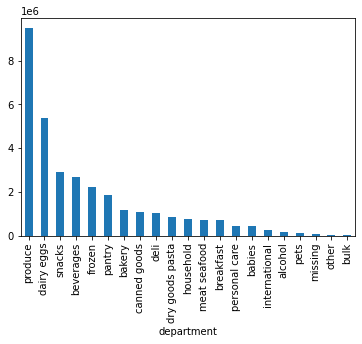

In [59]:
#Are there certain types of products that are more popular than others? The marketing
#and sales teams want to know which departments have the highest frequency of product orders.
#Orders by product
product_orders_bar = round(final_df.groupby(['department'])['order_id'].agg('count').sort_values(ascending=False),0).plot.bar()
product_orders_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'product_orders_bar_1902.png'))

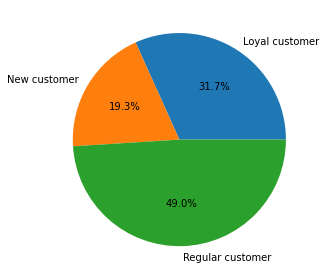

In [60]:
#What’s the distribution among users in regards to their brand loyalty (i.e., how
#often do they return to Instacart)?
# distribution among customers in regards to brand loyalty 
loyalty_pie = final_df['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
loyalty_pie.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'loyalty_pie_1902.png'))

In [61]:
#Are there differences in ordering habits based on a customer’s region?
#ordering habits based on a customer’s region
crosstab_department_region = pd.crosstab(final_df['department'], final_df['region'], dropna = False)
print(crosstab_department_region)

region           Midwest  Northeast    South     West
department                                           
alcohol            36186      26542    51624    39344
babies             98983      75139   143654   106026
bakery            273869     208599   388815   301145
beverages         625574     483418   898940   680191
breakfast         163551     123574   234251   181657
bulk                8193       5802    11533     9045
canned goods      250702     186755   356015   274586
dairy eggs       1264223     954026  1796969  1383529
deli              245678     186817   349419   269335
dry goods pasta   203769     151816   287444   223598
frozen            524096     390918   747900   571829
household         175824     131485   243070   188287
international      63736      46891    89142    69484
meat seafood      166129     124620   235752   182426
missing            16535      12374    23193    17043
other               8420       6585    12212     9074
pantry            442101    

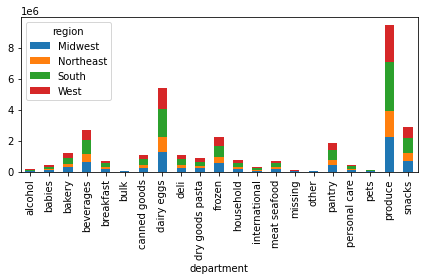

In [62]:
#Bar chart department & region
department_region_bar = crosstab_department_region.plot(kind = 'bar', stacked = True)
plt.tight_layout()
department_region_bar.figure.savefig(os.path.join(path, '4. Analysis','c. Visualisations', 'department_region_bar_1902.png'))

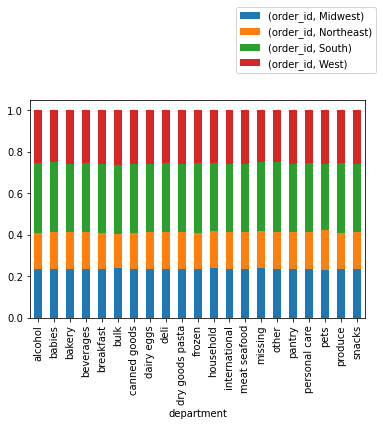

In [63]:
#100% bar chart department & region
department_region_100_bar = final_df.pivot_table(values=['order_id'], 
                      index='department',
                      columns='region',
                      aggfunc='sum')
department_region_100_bar = department_region_100_bar.div(department_region_100_bar.sum(1), axis=0)
department_region_100_bar.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor =(0.60, 1.10))

In [64]:
#● The marketing and sales teams are particularly interested in the different types of
#customers in their system and how their ordering behaviors differ. For example:

#● What differences can you find in ordering habits of different customer profiles? 
#Consider the price of orders, the frequency of orders, the products customers are ordering, 
#and anything else you can think of.

In [65]:
#● Is there a connection between age and family status in terms of ordering habits?
#What different classifications does the demographic information suggest?
#Age? Income? Certain types of goods? Family status?
# Exploring correlation between Customer profiles and departments
pivot_Cust_profile_dept = np.round(final_df.pivot_table(index='department', columns='Cust_profile', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Cust_profile_dept)
pivot_Cust_profile_dept.to_clipboard()

Cust_profile     Early retired  High earner >150k  \
department                                          
alcohol                71106.0            55560.0   
babies                189056.0           110430.0   
bakery                541986.0           310127.0   
beverages            1234129.0           657331.0   
breakfast             335012.0           183589.0   
bulk                   15485.0             8551.0   
canned goods          469675.0           267848.0   
dairy eggs           2696090.0          1501323.0   
deli                  497893.0           264036.0   
dry goods pasta       381932.0           210992.0   
frozen               1032245.0           583872.0   
household             313235.0           192404.0   
international         122796.0            68524.0   
meat seafood          687135.0           382784.0   
missing                33138.0            18910.0   
other                  15528.0             9231.0   
pantry                892216.0           51067

In [66]:
#ordering habits based on a customer’s region
#Exploring correlation between Customer profiles and regions
pivot_Cust_profile_region = np.round(final_df.pivot_table(index='Cust_profile', columns='region', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Cust_profile_region)
pivot_Cust_profile_region.to_clipboard()

region                                   Midwest   Northeast       South  \
Cust_profile                                                               
Early retired                          3563220.0   2719356.0   5008870.0   
High earner >150k                      1896779.0   1438272.0   2808338.0   
Married, high income with dep          5677297.0   4179167.0   7854715.0   
Married, low/middle income with dep   11938705.0   8835260.0  16967244.0   
Married, middle/high income with dep  23865774.0  18392815.0  34095488.0   
Older parent                                 NaN       390.0      1199.0   
Older retired                          1168992.0    845302.0   1548719.0   
Single, no dependents                  8238077.0   6044476.0  11755865.0   
Young parent                           2844133.0   2075068.0   4067472.0   
Total                                 59192978.0  44530106.0  84107910.0   

region                                      West        Total  
Cust_profile           

In [71]:
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Check,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_cost_by_cust,spender_flag,cust_frequency,frequency_flag,gender,state,age,date_joined,no_dependents,fam_status,income,Check_col,region,activity_flag,department,Check_join_dept,Generation,Income Bracket,Cust_profile
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,beverages,both,Millenials 25-40,Low <50k,"Married, low/middle income with dep"
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,dairy eggs,both,Millenials 25-40,Low <50k,"Married, low/middle income with dep"
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,snacks,both,Millenials 25-40,Low <50k,"Married, low/middle income with dep"
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,snacks,both,Millenials 25-40,Low <50k,"Married, low/middle income with dep"
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity,household,both,Millenials 25-40,Low <50k,"Married, low/middle income with dep"


In [73]:
final_df.groupby('activity_flag')['activity_flag'].count()

activity_flag
Low activity        1441570
Normal activity    30993489
Name: activity_flag, dtype: int64